## 基于神经网络的垃圾分类
垃圾分类，一般是指按一定规定或标准将垃圾分类储存、分类投放和分类搬运，从而转变成公共资源的一系列活动的总称。分类的目的是提高垃圾的资源价值和经济价值，力争物尽其用。

垃圾分为四类，分别是有害垃圾、厨余垃圾、可回收物和其他垃圾，其对应的垃圾桶颜色分别是红、绿、蓝、黑。
![](img/1.jpg)

垃圾分类的意义：

1、提高了废品回收利用的比例，能源再生，减少了原材料的需求，减少二氧化碳的排放。

2、将易腐有机成分为主的厨房垃圾单独分类，为垃圾堆肥提供优质原料，生产出优质的有机肥，这样有利于改善土壤肥力，减少化肥施用量。

3、普及环保与垃圾的知识，提升全社会对环卫行业的认知，减少环卫工人的工作难度，形成尊重、关心环卫工人的氛围。

4、把有害垃圾分类出来，减少了垃圾中的重金属、有机污染物、致病菌的含量，有利于垃圾的无害化处理，减少了垃圾处理的水、土壤、大气污染风险。

本次项目使用的数据集包括硬纸板、玻璃制品、金属、纸制品、塑料和废物垃圾等6种常见的生活垃圾共计2247张。项目分为3部分。数据处理、模型建立和模型测试。经过迭代模型在训练集上准确率达到89.89%左右，在验证集上准确率达到77.68%左右。

### 导入所需的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import glob, os, random
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD

### 路径定义

In [2]:
root_path = 'F:/案例/智能环保/基于深度学习的垃圾分类'
labels = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

## 1.数据处理
### 扩充训练样本
对样本图片进行缩放、翻转、选择等操作对样本进行扩充，使得样本数据更加丰富，有利于模型性能的提高。

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # 数据缩放，把像素点的值除以255，使之在0到1之间
    shear_range=0.1,  # 错切变换角度
    zoom_range=0.1,  # 随机缩放范围
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip=True,
    vertical_flip = True,
    validation_split = 0.1
)
# 归一化验证集
val_datagen = ImageDataGenerator(
    rescale=1. / 255,validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    root_path+'/dataset',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0)

val_generator = val_datagen.flow_from_directory(
    root_path+'/dataset',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0)

Found 2024 images belonging to 6 classes.
Found 223 images belonging to 6 classes.


## 2.模型创建
### 创建网络
使用keras创建卷积神经网络进行模型的建立。

In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())  # 扁平化参数
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 32)        9

### 编译网络

In [6]:
model.compile(loss='categorical_crossentropy',
                   optimizer='adam',#sgd 'adam'
                   metrics=['accuracy'])

### 网络训练

In [7]:
history_fit = model.fit_generator(train_generator,
                                  epochs=100,  # 迭代总轮数
                                  steps_per_epoch=2276//32,  # generator 产生的总步数（批次样本）
                                  validation_data=val_generator,  # 验证数据的生成器
                                  validation_steps=251//32)

Epoch 1/100
71/71 [==============================] - 104s 1s/step - loss: 1.5525 - accuracy: 0.3227 - val_loss: 1.6099 - val_accuracy: 0.2500
Epoch 2/100
71/71 [==============================] - 104s 1s/step - loss: 1.2958 - accuracy: 0.4621 - val_loss: 1.2653 - val_accuracy: 0.4554
Epoch 3/100
71/71 [==============================] - 105s 1s/step - loss: 1.1596 - accuracy: 0.5213 - val_loss: 1.3033 - val_accuracy: 0.4821
Epoch 4/100
71/71 [==============================] - 104s 1s/step - loss: 1.1566 - accuracy: 0.5186 - val_loss: 1.7038 - val_accuracy: 0.2768
Epoch 5/100
71/71 [==============================] - 105s 1s/step - loss: 1.0805 - accuracy: 0.5638 - val_loss: 0.9755 - val_accuracy: 0.5804
Epoch 6/100
71/71 [==============================] - 104s 1s/step - loss: 1.0232 - accuracy: 0.6028 - val_loss: 1.0741 - val_accuracy: 0.5179
Epoch 7/100
71/71 [==============================] - 103s 1s/step - loss: 0.9752 - accuracy: 0.6215 - val_loss: 1.1301 - val_accuracy: 0.5714
Epoch 

### 准确率和损失值的可视化

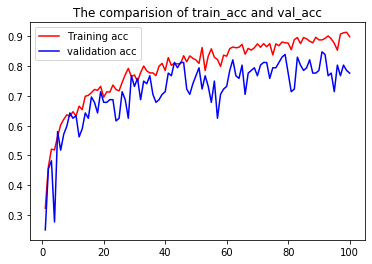

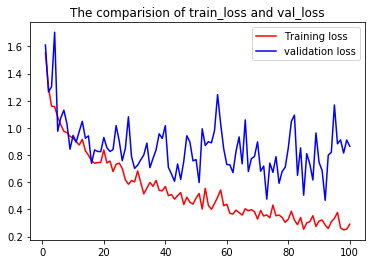

In [8]:
with open(root_path + "/history_fit.json", "w") as json_file:
    json_file.write(str(history_fit))

acc = history_fit.history['accuracy']
val_acc = history_fit.history['val_accuracy']
loss = history_fit.history['loss']
val_loss = history_fit.history['val_loss']

epochs = range(1, len(acc) + 1) 
plt.figure("acc")
plt.plot(epochs, acc, 'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('The comparision of train_acc and val_acc')
plt.legend()
plt.show()

plt.figure("loss")
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('The comparision of train_loss and val_loss')
plt.legend()
plt.show()

- 第一张图显示训练集和验证集上准确率随迭代次数的变化情况。
- 第二张图显示在训练集和验证集上的损失值的变化情况。

## 3.模型测试
### 模型保存

In [9]:
model_json=model.to_json()
with open(root_path+'/model_json.json', "w") as json_file:
    json_file.write(model_json)
model.save_weights(root_path+'/model_weight.h5')
model.save(root_path+'/model.h5')
print('model saved')

model saved


### 模型加载

In [10]:
json_file = open(root_path + '/model_json.json')  # 加载模型结构文件
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)  # 结构文件转化为模型
# 加载权重
model.load_weights(root_path + '/model_weight.h5')  # h5文件保存模型的权重数据

### 测试垃圾图片

In [12]:
img_path = "F:/案例/智能环保/基于深度学习的垃圾分类/test_data/cardboard.jpg"
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
result = model.predict(img)

### 显示垃圾类型

In [13]:
def generate_result(result):
    for i in range(6):
        if(result[0][i] == 1):
            return labels[i]

print(generate_result(result))

cardboard


- 图片显示的垃圾为cardboard，使用模型进行预测的结果也显示cardboard

## 总结

从结果显示可以看到，模型的准确率还有待提高，其中一个很主要的原因是数据量比较少，而且从准确率和损失值的变化图可以看到，迭代次数应当适当的提高.